1. Import Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

2. Load Gamma telescope data

In [ ]:
cols=["flength","fwidth","fsize","fconc","fcocl","fasym","fm3long","fm3trans","falpha","fdist","class"]
df=pd.read_csv("magic04.data", names=cols)
df.head()

,flength,fwidth,fsize,fconc,fcocl,fasym,fm3long,fm3trans,falpha,fdist,class
0,28.80,16.00,2.64,0.39,0.20,27.70,22.01,-8.20,40.09,81.88,g
1,31.60,11.72,2.52,0.53,0.38,26.27,23.82,-9.96,6.36,205.26,g
2,162.05,136.03,4.06,0.04,0.02,116.74,-64.86,-45.22,76.96,256.79,g
3,23.82,9.57,2.34,0.61,0.39,27.21,-6.46,-7.15,10.45,116.74,g
4,75.14,30.92,3.16,0.32,0.18,-5.53,28.55,21.84,4.65,356.46,g


In [ ]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [ ]:
df["class"]=(df["class"]=="g").astype(int)

In [ ]:
df.head()

,flength,fwidth,fsize,fconc,fcocl,fasym,fm3long,fm3trans,falpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


3. plot the graphs for data visualisation

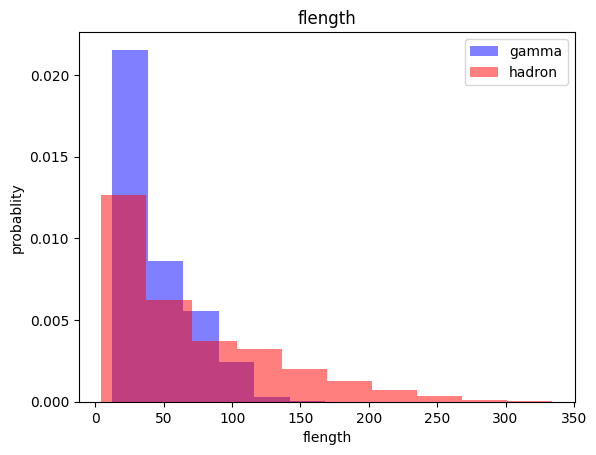

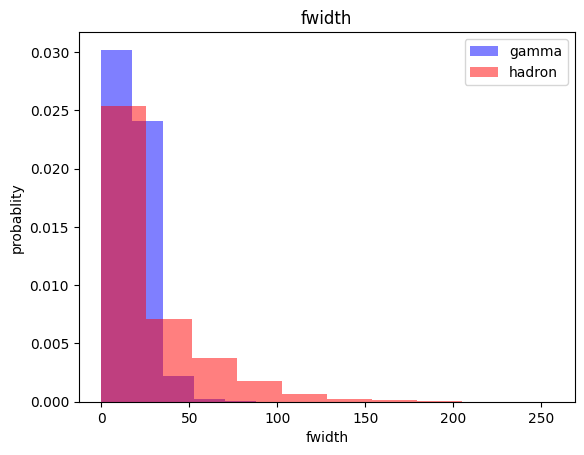

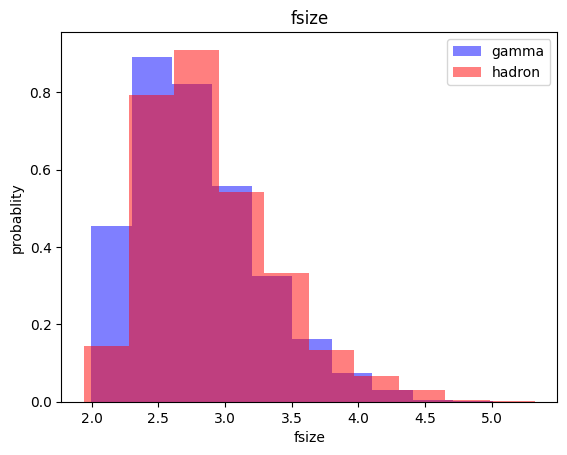

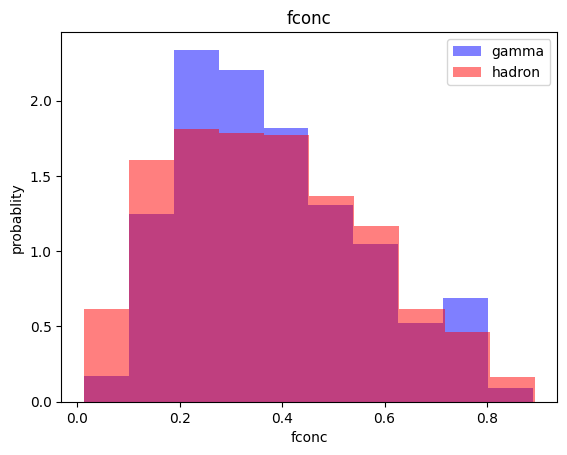

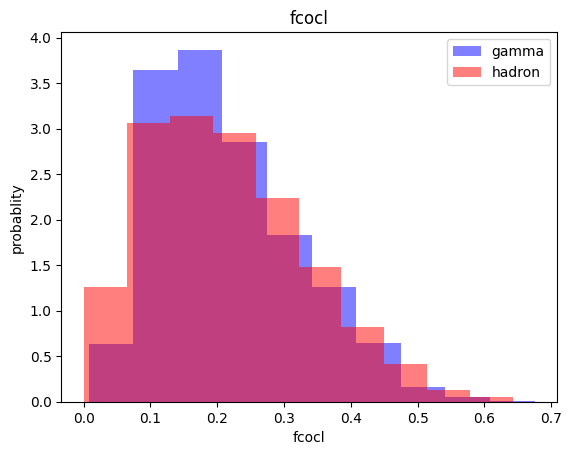

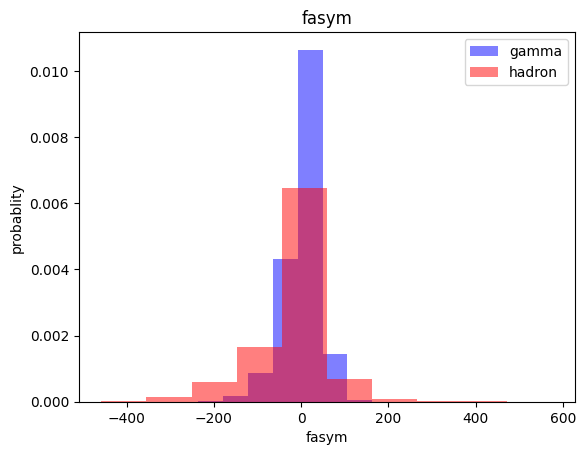

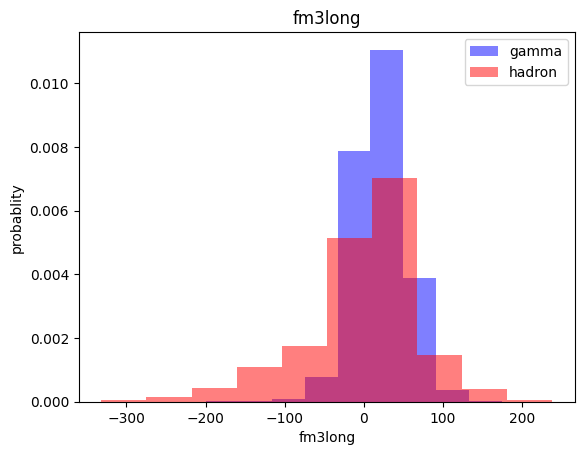

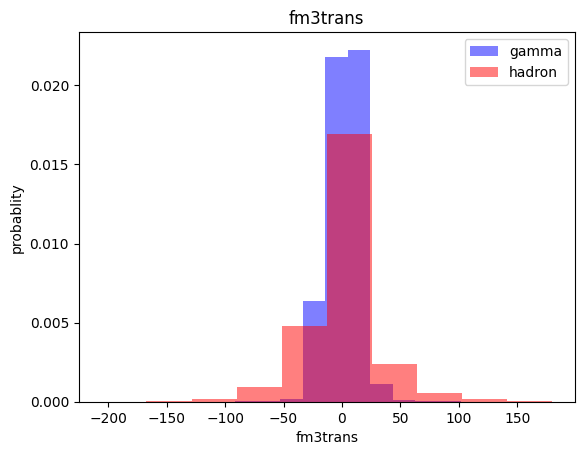

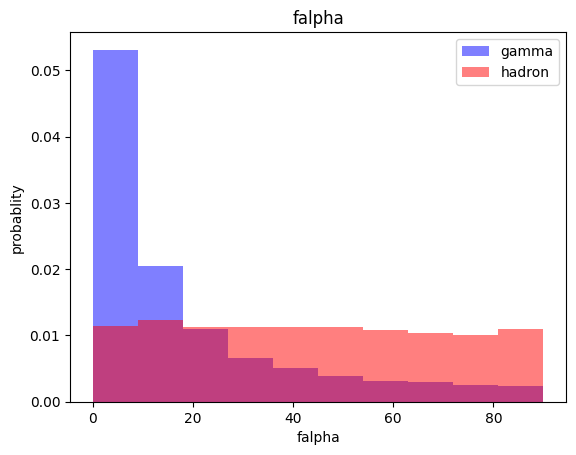

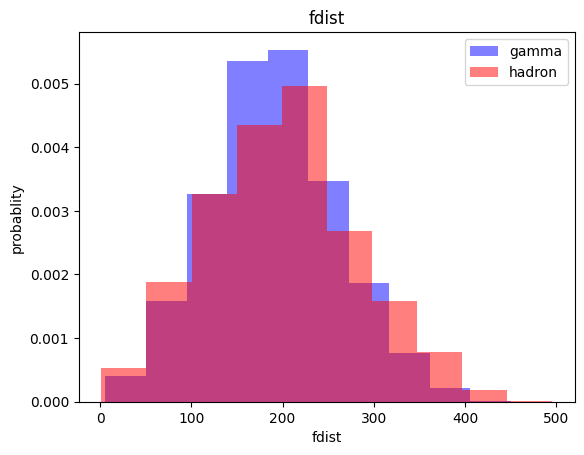

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue',label='gamma',alpha=0.5,density=True)
  plt.hist(df[df["class"]==0][label], color='red',label='hadron',alpha=0.5,density=True)
  plt.title(label)
  plt.ylabel("probablity")
  plt.xlabel(label)
  plt.legend()
  plt.show()

4. split the dataset

In [ ]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe,oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values
  scaler= StandardScaler()
  x=scaler.fit_transform(x)
  if oversample:
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)
  data=np.hstack((x,np.reshape(y,(-1,1))))

  return data,x,y

In [ ]:
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))


7422
3990


In [ ]:
train,x_train,y_train=scale_dataset(train,oversample=True)
valid,x_valid,y_valid=scale_dataset(valid,oversample=False)
test,x_test,y_test=scale_dataset(test,oversample=False)

In [ ]:
len(y_train)

14908

5. Building Model with 4 different Algorithms

###k nearest neighbor model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=knn_model.predict(x_test)

In [ ]:
y_pred


array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
y_test

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72      1319
           1       0.84      0.88      0.86      2485

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.82      0.81      3804



### naive bayes model


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)

In [ ]:
y_pred=nb_model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.40      0.74      0.52       748
           1       0.92      0.73      0.81      3056

    accuracy                           0.73      3804
   macro avg       0.66      0.73      0.66      3804
weighted avg       0.82      0.73      0.75      3804



###logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train, y_train)

In [ ]:
y_pred=lg_model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1390
           1       0.83      0.84      0.84      2414

    accuracy                           0.79      3804
   macro avg       0.78      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



### support vector machines model

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model=SVC()
svm_model.fit(x_train,y_train)

SVC()

In [ ]:
y_pred,y_test

(array([0.87, 1.  , 0.12, ..., 0.99, 0.49, 0.83]),
 array([0, 1, 0, ..., 1, 0, 1]))

In [ ]:
y_pred=svm_model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1250
           1       0.91      0.89      0.90      2554

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



6. conclusion

For the given Dataset, we apply 4 different Algorithms and SVM algorithm gives the beat Accuracy among all four. we use model.fit() method to train the model and  model.predict() method to check the valdation for train data.

For Results we use classification_report from Scikit-Learn and then check the accuracy for the desired algorithm model.